In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ex_path = "/Users/tie_zhao/Desktop/Soma_QC_re/Results/04.phom_day0_vs_naga/PHOMday0_vs_NAGA.qcsample.ex.csv"
ex_df = pd.read_csv(ex_path, index_col=0)

In [2]:
ex_df.index = ex_df.index.str.replace("_day0", "")
ex_df.index = ex_df.index.str.replace("SS-229363_v4.1_EDTA_Plasma.hybNorm.medNormInt.plateScale.calibration.anmlQC.qcCheck.anmlSMP", "CTEPH")
ex_df.index = ex_df.index.str.replace("FL-23-012_v4.1_EDTAPlasma.hybNorm.medNormInt.plateScale.calibrate.anmlQC.qcCheck.anmlSMP", "NAGA_1")
ex_df.index = ex_df.index.str.replace("FL-23-013_v4.1_EDTAPlasma.hybNorm.medNormInt.plateScale.calibrate.anmlQC.qcCheck.anmlSMP", "NAGA_2")
ex_df_log2 = np.log2(ex_df)

In [3]:
from sklearn.decomposition import PCA
import plotly.express as px

filtered_df = ex_df_log2[ex_df_log2.index.str.startswith('QC') | ex_df_log2.index.str.startswith('NAG')]

pca = PCA(n_components=3)
pca_result = pca.fit_transform(filtered_df)

explained_variance = pca.explained_variance_ratio_
total_explained_variance = explained_variance.sum()

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])
pca_df['sample'] = filtered_df.index
pca_df['group'] = pca_df['sample'].apply(lambda x: 'NAGA' if x.startswith('NAG') else 'QC')

fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3', color='group', hover_name='sample',
                    hover_data={'PC1': False, 'PC2': False, 'PC3': False, 'group': False},
                    color_discrete_map={'NAGA': 'blue', 'QC': 'red'})
fig.update_traces(marker=dict(size=3, opacity=0.6)) 

fig.update_layout(
    title=f'PCA of QC and NAGA samples ({total_explained_variance:.2%})',
    title_font_size=20,
    legend=dict(
        title_text='',  
        itemsizing='constant', 
        font=dict(size=12) 
    ),
    scene=dict(
        xaxis_title=f'PC1 ({explained_variance[0]:.2%})',
        yaxis_title=f'PC2 ({explained_variance[1]:.2%})',
        zaxis_title=f'PC3 ({explained_variance[2]:.2%})'
    ),
    font=dict(family="Arial", size=10, color="black"),
    margin=dict(l=0, r=0, b=0, t=100),  
    width=500, 
    height=491
)
fig.update_scenes(camera=dict(eye=dict(x=2, y=2, z=1)))
fig.show()

In [4]:
from sklearn.decomposition import PCA
import plotly.express as px

filtered_df = ex_df_log2[ex_df_log2.index.str.startswith('QC')]

pca = PCA(n_components=3)
pca_result = pca.fit_transform(filtered_df)

explained_variance = pca.explained_variance_ratio_
total_explained_variance = explained_variance.sum()

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])
pca_df['sample'] = filtered_df.index
pca_df['group'] = pca_df['sample'].apply(lambda x: 'QC' if x.startswith('QC') else '')

fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3', color='group', hover_name='sample',
                    hover_data={'PC1': False, 'PC2': False, 'PC3': False, 'group': False},
                    color_discrete_map={'QC': 'red'})
fig.update_traces(marker=dict(size=3, opacity=0.6)) 

fig.update_layout(
    title=f'PCA of QC samples ({total_explained_variance:.2%})',
    title_font_size=20,
    legend=dict(
        title_text='',  
        itemsizing='constant', 
        font=dict(size=12) 
    ),
    scene=dict(
        xaxis_title=f'PC1 ({explained_variance[0]:.2%})',
        yaxis_title=f'PC2 ({explained_variance[1]:.2%})',
        zaxis_title=f'PC3 ({explained_variance[2]:.2%})'
    ),
    font=dict(family="Arial", size=10, color="black"),
    margin=dict(l=0, r=0, b=0, t=100),  
    width=500, 
    height=491
)
fig.update_scenes(camera=dict(eye=dict(x=2, y=2, z=1)))
fig.show()

In [5]:
qc_sample_rm = "QC_EXID40000009491274_in_NAGA_1"
qc_check_ex = ex_df_log2[~ex_df_log2.index.str.startswith('PHOM')]
qc_check_ex_rm = qc_check_ex.drop(qc_sample_rm) # remove outlier QC sample from the dataset

def modify_index(idx):
    if 'QC' in idx and 'NAGA' in idx:
        return 'QC_NAGA'
    elif 'QC' in idx and 'CTEPH' in idx:
        return 'QC_CTEPH'
    return idx

qc_check_ex_rm.index = qc_check_ex_rm.index.map(modify_index)

In [6]:
from plotting_module import parallel_plot

qc_check_1 = qc_check_ex_rm

qc_check_1['group'] = qc_check_1.index.map(
    lambda x: 'QC_NAGA' if x.startswith('QC_NAGA') else
              'QC_CTEPH' if x.startswith('QC_CTEPH') else
              'NAG')

parallel_plot(qc_check_1, 'qc_boxplot')

/Users/tie_zhao/miniconda3/envs/py_work/lib/python3.12/site-packages/pandas/plotting/_matplotlib/tools.py:233: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(**fig_kw)
/Users/tie_zhao/miniconda3/envs/py_work/lib/python3.12/site-packages/pandas/plotting/_matplotlib/tools.py:233: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(**fig_kw)
/Users/tie_zhao/miniconda3/envs/py_work/lib/python3.12/site-packages/pandas/plotting/_matplotl

Saved combined plots to qc_boxplot/qc_boxplots.pdf


In [8]:
qc_check_ex_rm = qc_check_ex_rm.drop(columns=['group'])

a_class = qc_check_ex_rm.index.str.startswith('QC_CTEPH')
b_class = qc_check_ex_rm.index.str.startswith('QC_NAGA')
c_class = qc_check_ex_rm.index.str.startswith('NAG')

mean_a = qc_check_ex_rm[a_class].mean()
mean_b = qc_check_ex_rm[b_class].mean()
mean_c = qc_check_ex_rm[c_class].mean()

diff_c_a = abs(mean_c - mean_a)
diff_c_b = abs(mean_c - mean_b)

result_df = pd.DataFrame({
    'C_minus_A': diff_c_a,
    'C_minus_B': diff_c_b
})

result_df.index.name = 'SeqId'


/Users/tie_zhao/miniconda3/envs/py_work/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.

/Users/tie_zhao/miniconda3/envs/py_work/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



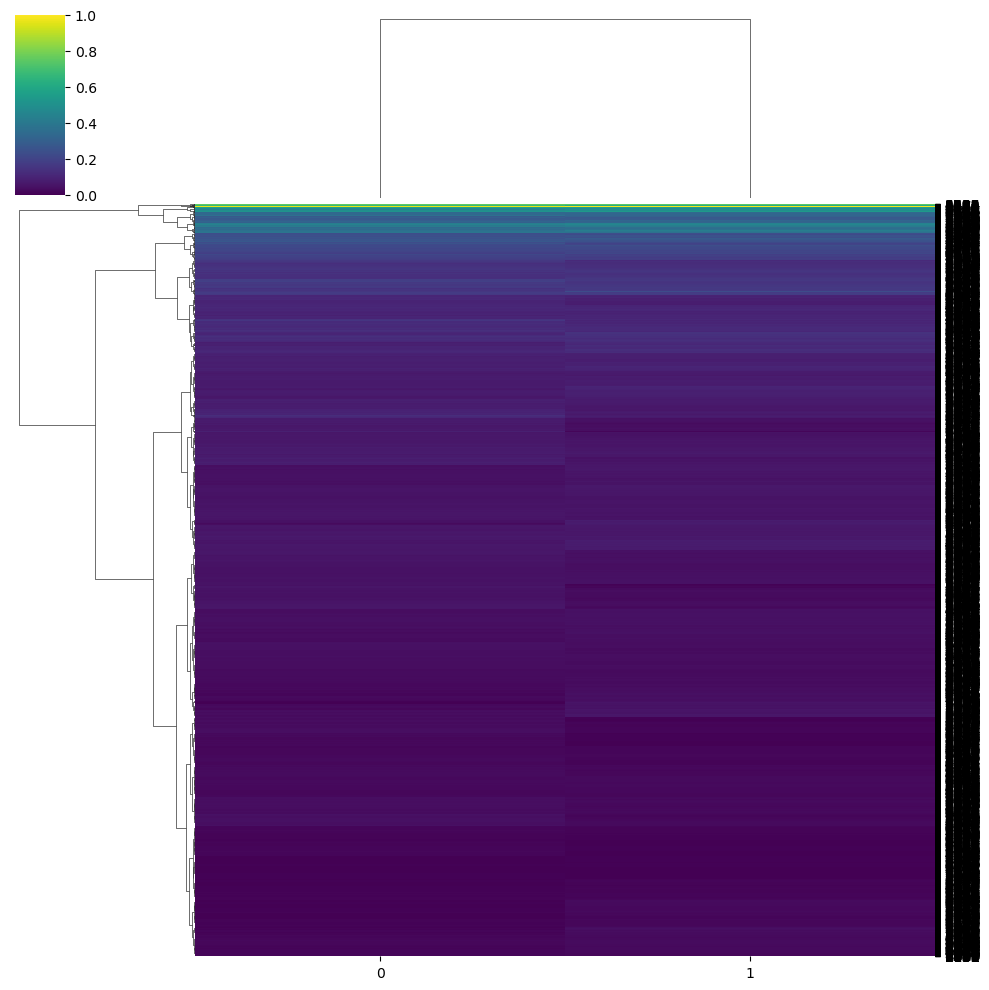

In [9]:
import pandas as pd
import seaborn as sns

plt.style.use('default')

X = result_df.values

sns.clustermap(X, method='ward', cmap='viridis', standard_scale=1,
               yticklabels=True, figsize=(10, 10))



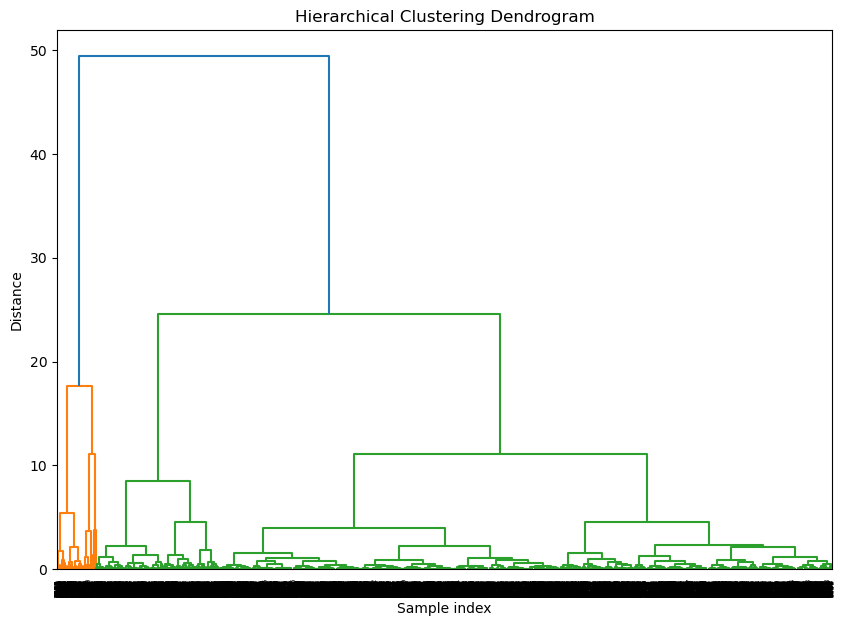

In [10]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

X = result_df.values
Z = linkage(X, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


In [18]:
from scipy.cluster.hierarchy import fcluster

max_d = 20
clusters = fcluster(Z, max_d, criterion='distance')

seq_ids = result_df.index
cluster_assignments = pd.DataFrame({'SeqId': seq_ids, 'Cluster': clusters})


In [19]:
select_ids = cluster_assignments[cluster_assignments['Cluster'] == 3]['SeqId']
select_ids_list = select_ids.tolist()

final_qc_ex = qc_check_ex_rm[select_ids_list]

In [20]:
from sklearn.decomposition import PCA
import plotly.express as px

pca = PCA(n_components=3)
pca_result = pca.fit_transform(final_qc_ex)

explained_variance = pca.explained_variance_ratio_
total_explained_variance = explained_variance.sum()

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])
pca_df['sample'] = final_qc_ex.index
pca_df['group'] = pca_df['sample'].apply(lambda x: 'NAGA' if x.startswith('NAG') else 'QC')

fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3', color='group', hover_name='sample',
                    hover_data={'PC1': False, 'PC2': False, 'PC3': False, 'group': False},
                    color_discrete_map={'NAGA': 'blue', 'QC': 'red'})
fig.update_traces(marker=dict(size=3, opacity=0.6)) 

fig.update_layout(
    title=f'PCA of QC and NAGA samples ({total_explained_variance:.2%})',
    title_font_size=20,
    legend=dict(
        title_text='',  
        itemsizing='constant', 
        font=dict(size=12) 
    ),
    scene=dict(
        xaxis_title=f'PC1 ({explained_variance[0]:.2%})',
        yaxis_title=f'PC2 ({explained_variance[1]:.2%})',
        zaxis_title=f'PC3 ({explained_variance[2]:.2%})'
    ),
    font=dict(family="Arial", size=10, color="black"),
    margin=dict(l=0, r=0, b=0, t=100),  
    width=500, 
    height=491
)
fig.update_scenes(camera=dict(eye=dict(x=2, y=2, z=1)))
fig.show()

In [21]:
from sklearn.decomposition import PCA
import plotly.express as px

filtered_df = final_qc_ex[final_qc_ex.index.str.startswith('QC')]

pca = PCA(n_components=3)
pca_result = pca.fit_transform(filtered_df)

explained_variance = pca.explained_variance_ratio_
total_explained_variance = explained_variance.sum()

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])
pca_df['sample'] = filtered_df.index
pca_df['group'] = pca_df['sample'].apply(lambda x: 'QC' if x.startswith('QC') else '')

fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3', color='group', hover_name='sample',
                    hover_data={'PC1': False, 'PC2': False, 'PC3': False, 'group': False},
                    color_discrete_map={'QC': 'red'})
fig.update_traces(marker=dict(size=3, opacity=0.6)) 

fig.update_layout(
    title=f'PCA of QC samples ({total_explained_variance:.2%})',
    title_font_size=20,
    legend=dict(
        title_text='',  
        itemsizing='constant', 
        font=dict(size=12) 
    ),
    scene=dict(
        xaxis_title=f'PC1 ({explained_variance[0]:.2%})',
        yaxis_title=f'PC2 ({explained_variance[1]:.2%})',
        zaxis_title=f'PC3 ({explained_variance[2]:.2%})'
    ),
    font=dict(family="Arial", size=10, color="black"),
    margin=dict(l=0, r=0, b=0, t=100),  
    width=500, 
    height=491
)
fig.update_scenes(camera=dict(eye=dict(x=2, y=2, z=1)))
fig.show()

In [22]:
final_ex_df_log2 = ex_df_log2[select_ids_list]

In [23]:
from sklearn.decomposition import PCA
import plotly.express as px
import pandas as pd

pca = PCA(n_components=3)
pca_result = pca.fit_transform(final_ex_df_log2)

explained_variance = pca.explained_variance_ratio_
total_explained_variance = explained_variance.sum()

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])
pca_df['sample'] = final_ex_df_log2.index
pca_df['group'] = pca_df['sample'].apply(lambda x: 'NAGA' if x.startswith('NAG') else ('CTEPH' if x.startswith('PHOM') else 'QC'))

fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3', color='group', hover_name='sample',
                    hover_data={'PC1': False, 'PC2': False, 'PC3': False, 'group': False},
                    color_discrete_map={'NAGA': 'blue', 'QC': 'red', 'CTEPH': 'orange'})
fig.update_traces(marker=dict(size=3, opacity=0.6)) 

fig.update_layout(
    title=f'PCA of QC, NAGA, and CTEPH samples ({total_explained_variance:.2%})',
    title_font_size=20,
    legend=dict(
        title_text='',  
        itemsizing='constant', 
        font=dict(size=12) 
    ),
    scene=dict(
        xaxis_title=f'PC1 ({explained_variance[0]:.2%})',
        yaxis_title=f'PC2 ({explained_variance[1]:.2%})',
        zaxis_title=f'PC3 ({explained_variance[2]:.2%})'
    ),
    font=dict(family="Arial", size=10, color="black"),
    margin=dict(l=0, r=0, b=0, t=100),  
    width=500, 
    height=491
)
fig.update_scenes(camera=dict(eye=dict(x=2, y=2, z=1)))
fig.show()

In [24]:
fig = px.scatter(pca_df, x='PC1', y='PC2', color='group', hover_name='sample',
                 hover_data={'PC1': False, 'PC2': False, 'group': False},
                 color_discrete_map={'NAGA': 'blue', 'QC': 'red', 'CTEPH': 'orange'})

fig.update_layout(
    title=f'PCA of QC, NAGA, and CTEPH samples ({total_explained_variance:.2%})',
    title_font_size=20,
    legend=dict(
        title_text='',  
        itemsizing='constant', 
        font=dict(size=12) 
    ),
    xaxis_title=f'PC1 ({explained_variance[0]:.2%})',
    yaxis_title=f'PC2 ({explained_variance[1]:.2%})',
    font=dict(family="Arial", size=10, color="black"),
    margin=dict(l=0, r=0, b=0, t=100),  
    width=500, 
    height=491
)

fig.show()